# Tutorial 3
PCA on synthetic data

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

### Example 2
Applying PCA on a linear progressive wave y(x,t) = sin(kx - wt) + 2

In [2]:
#create the input data
k = 2*np.pi/100
omega = 2*np.pi/50
x = [float(ii) for ii in range(1,101)]
t = [float(ii) for ii in range(1,201)]
y = []

for ii in range(200):
    yii = [np.sin(k*x[jj] - omega*t[ii])+2 for jj in range(100)]
    y.append(yii)


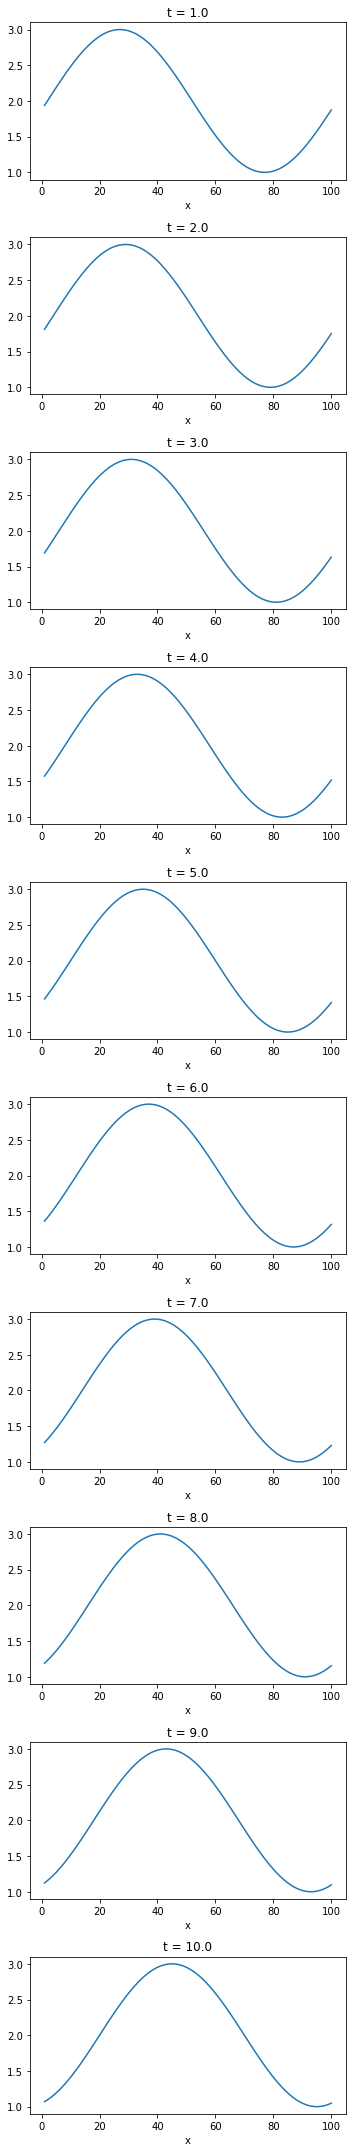

In [3]:
#visualize the spatial wave (in x domain) for first few time steps
#note that it propagates forward in time

plt.figure(figsize=(5,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(x,y[ii])
    plt.xlabel('x')
    plt.title('t = '+str(t[ii]))
    
plt.tight_layout()
plt.show()

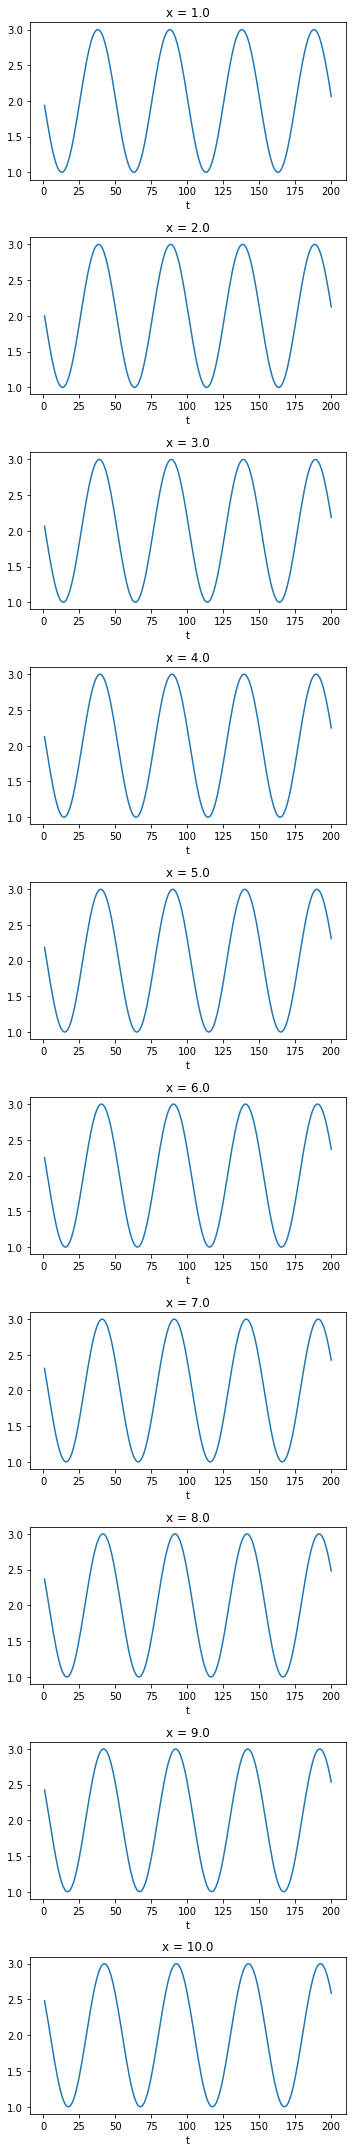

In [4]:
#visualize temporal wave (in t domain) for each point in x
plt.figure(figsize = (5,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(t,np.transpose(y)[ii])
    plt.xlabel('t')
    plt.title('x = '+str(x[ii]))
    
plt.tight_layout()
plt.show()

In [5]:
#now, do PCA using built-in library

n_modes = np.shape(y)[1] #dimension of input = 100, so want 100 modes
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(y)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

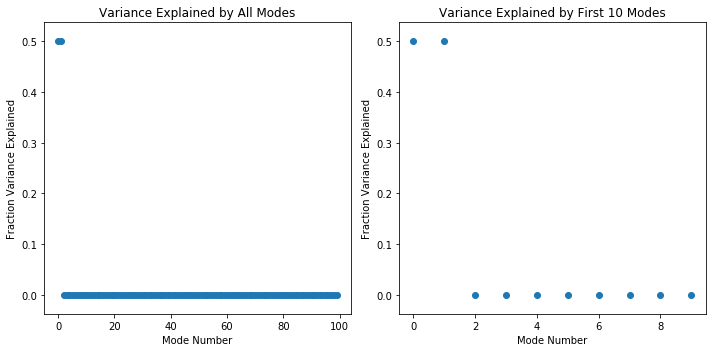

In [6]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

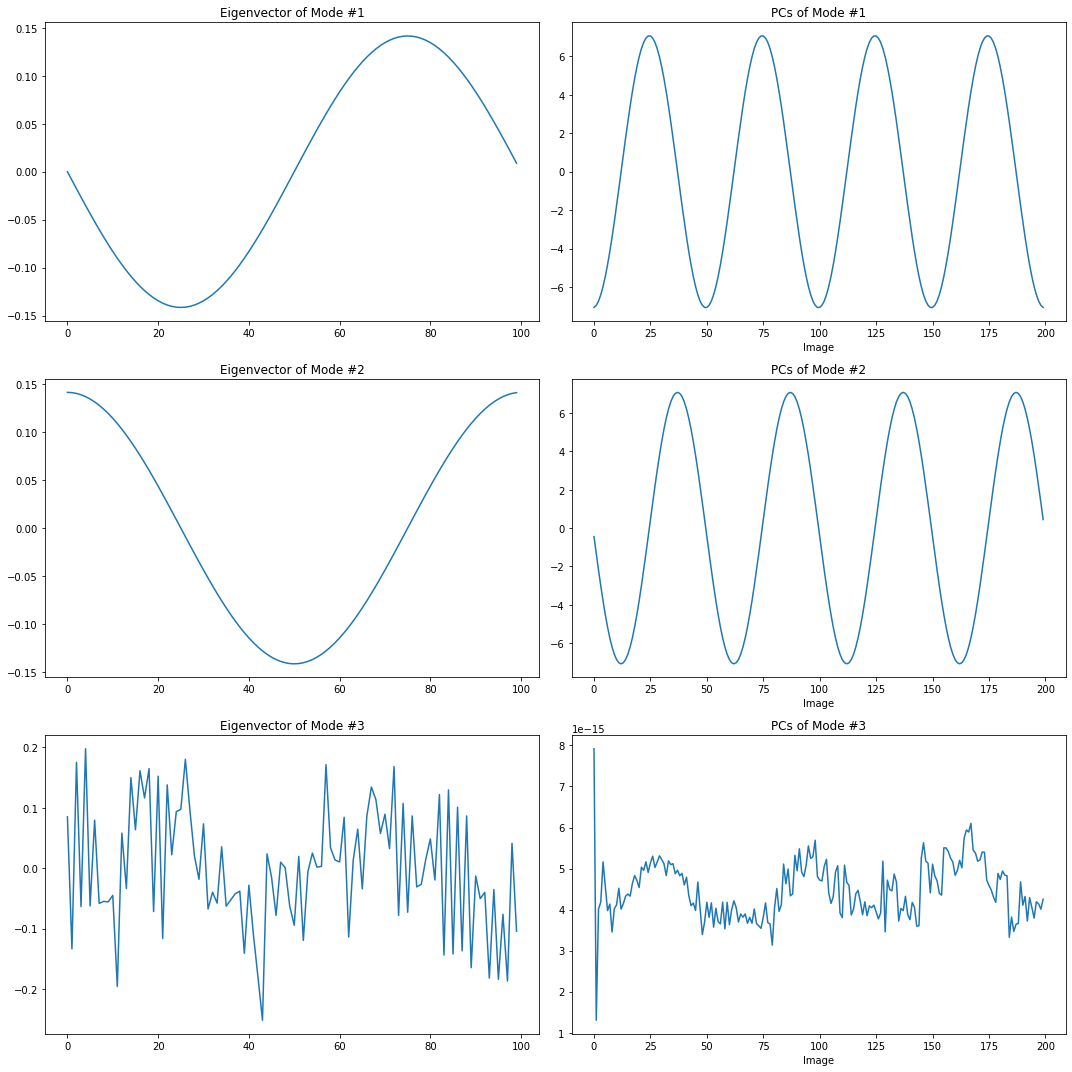

In [7]:
#plot the first n modes and PCs

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Image')
    
    plt.tight_layout()

In [8]:
#reconstruct data from PCs and eigenvectors
#y(t) - mean(y(t)) = sum(PC_j(t)*e_j)

#find mean for each y
mean_y = np.mean(y,axis=1)

#reconstructing y[1] -- this is y(x,t=1)
y_rec = []
y_rec.append(PCs[0,0]*eigvecs[0] + PCs[0,1]*eigvecs[1])
y_rec[0]+=mean_y[0]

#now, reconstruct all in a loop!
for jj in range(1,200):
    y_rec.append(PCs[jj,0]*eigvecs[0] + PCs[jj,1]*eigvecs[1])
    y_rec[jj]+=mean_y[jj]
    


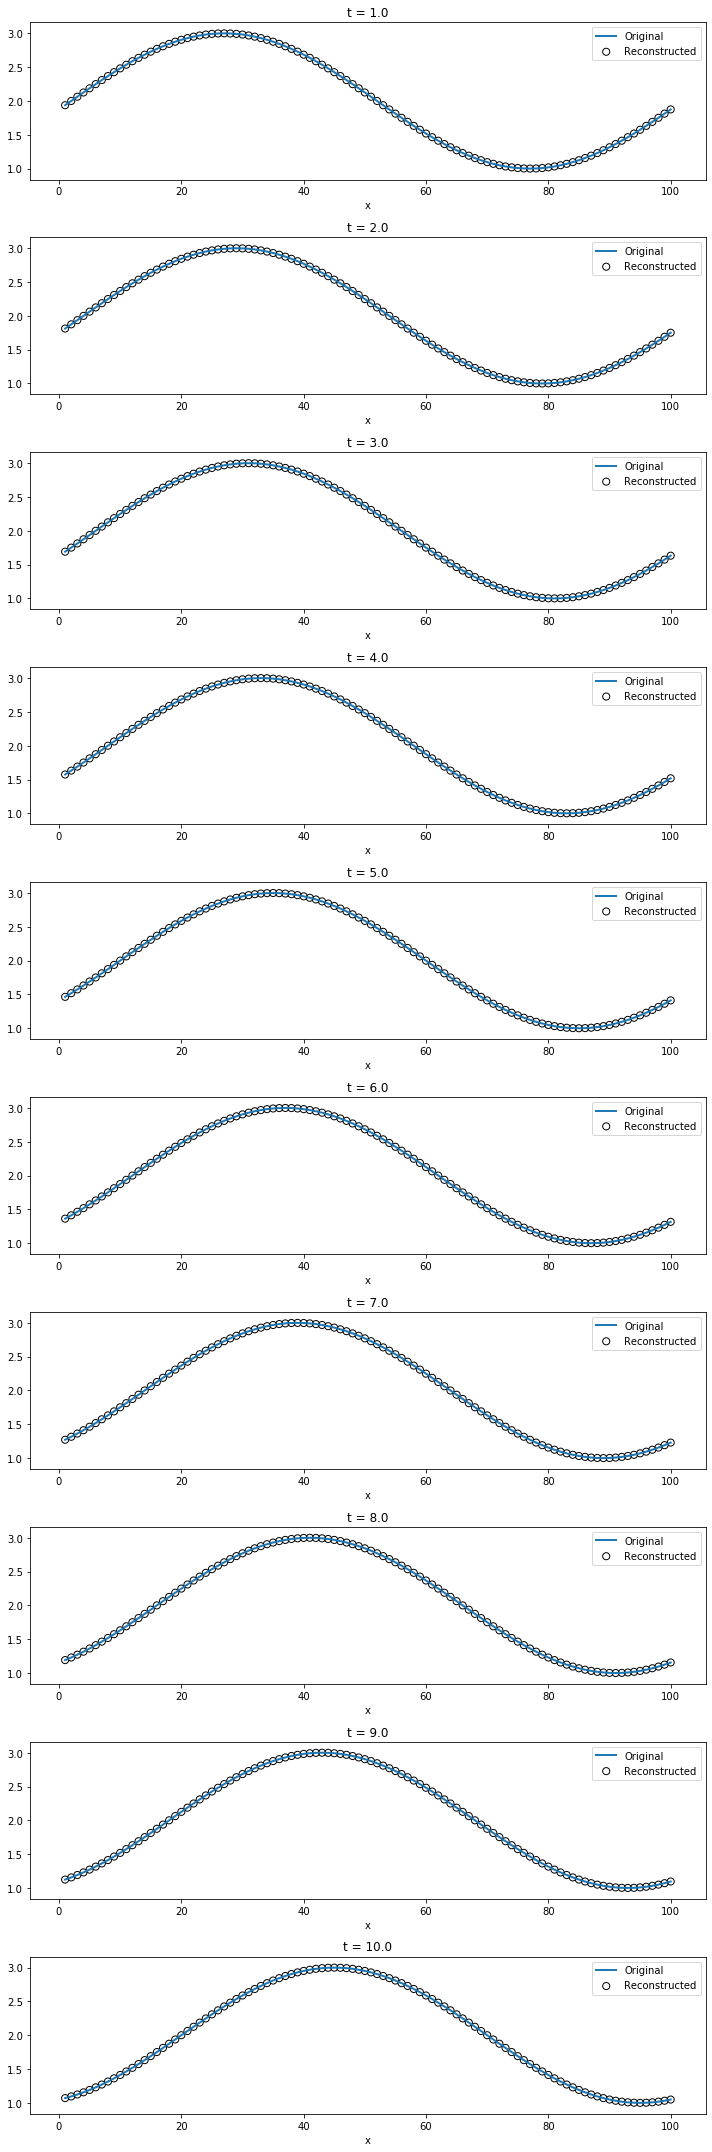

In [9]:
#compare reconstruction with original data to confirm similarity

plt.figure(figsize=(10,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(x,y[ii],linewidth=2)
    plt.scatter(x,y_rec[ii],s=50,facecolors='none',edgecolors='k')
    plt.xlabel('x')
    plt.title('t = '+str(t[ii]))
    plt.legend(['Original','Reconstructed'])
    
plt.tight_layout()
plt.show()

In [10]:
#now, let's do the same thing, but manually instead of using pre-built PCA tools

yn = np.transpose(y)
mean_y = np.mean(yn, axis=0)
yn -= mean_y #remove mean

s = np.cov(yn) #covariance matrix
eigvals,eigvecs = np.linalg.eig(s) #find eigenvalues/vectors
fracVar = eigvals/np.sum(eigvals)
PCs = eigvecs.T @ yn

#take transpose of eigvecs and PCs so that their dimensions match those when using PCA functions
eigvecs = eigvecs.T
PCs = PCs.T

#now, reconstruct all in a loop!
y_rec = []
for jj in range(200):
    y_rec.append(PCs[jj,0]*eigvecs[0] + PCs[jj,1]*eigvecs[1])
    y_rec[jj]+=mean_y[jj]

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


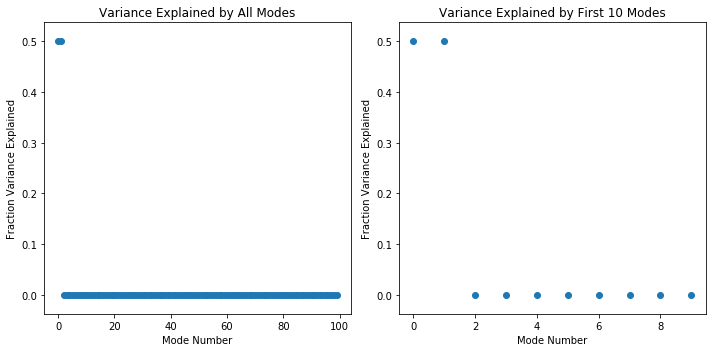

In [11]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


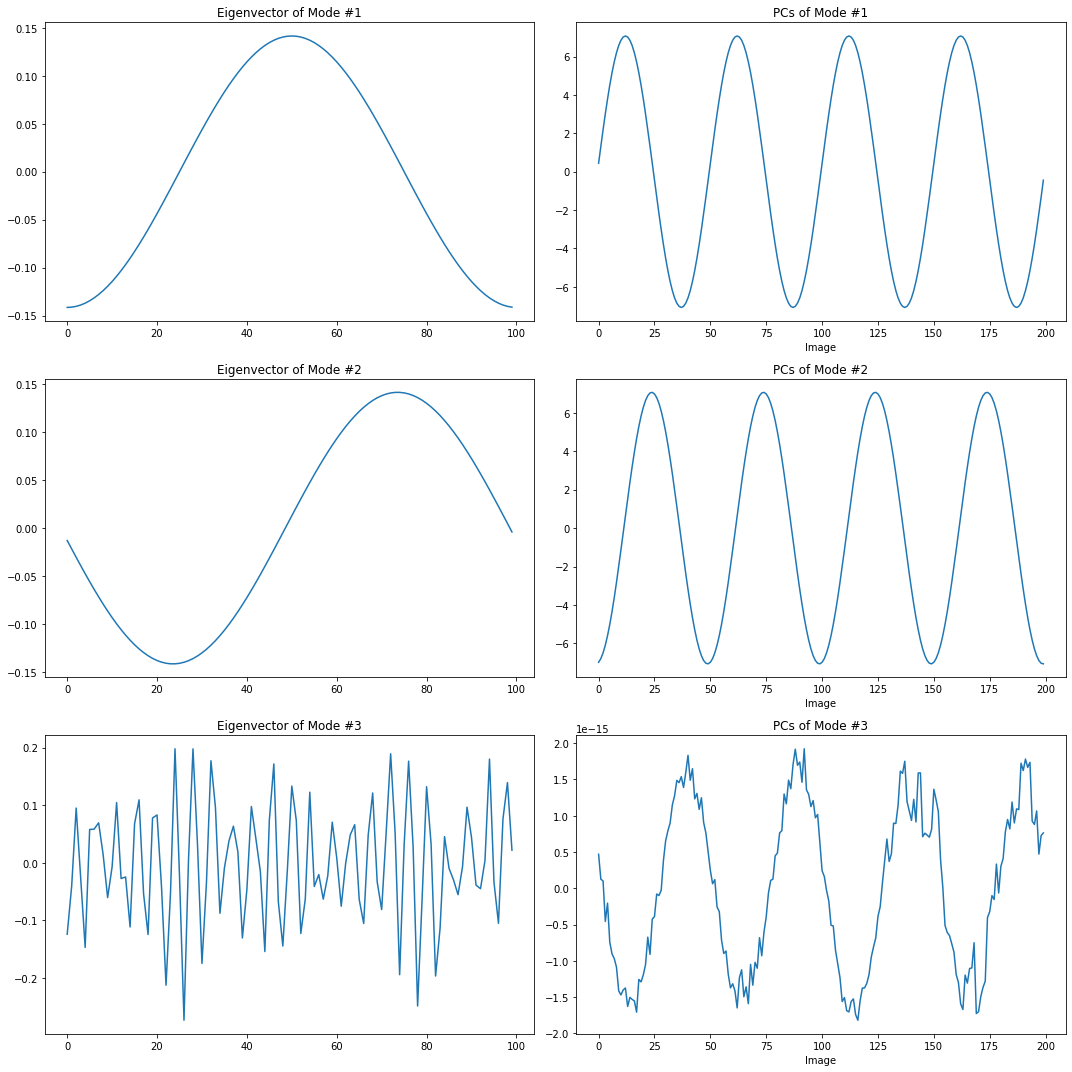

In [12]:
#plot the first n modes and PCs

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Image')
    
    plt.tight_layout()

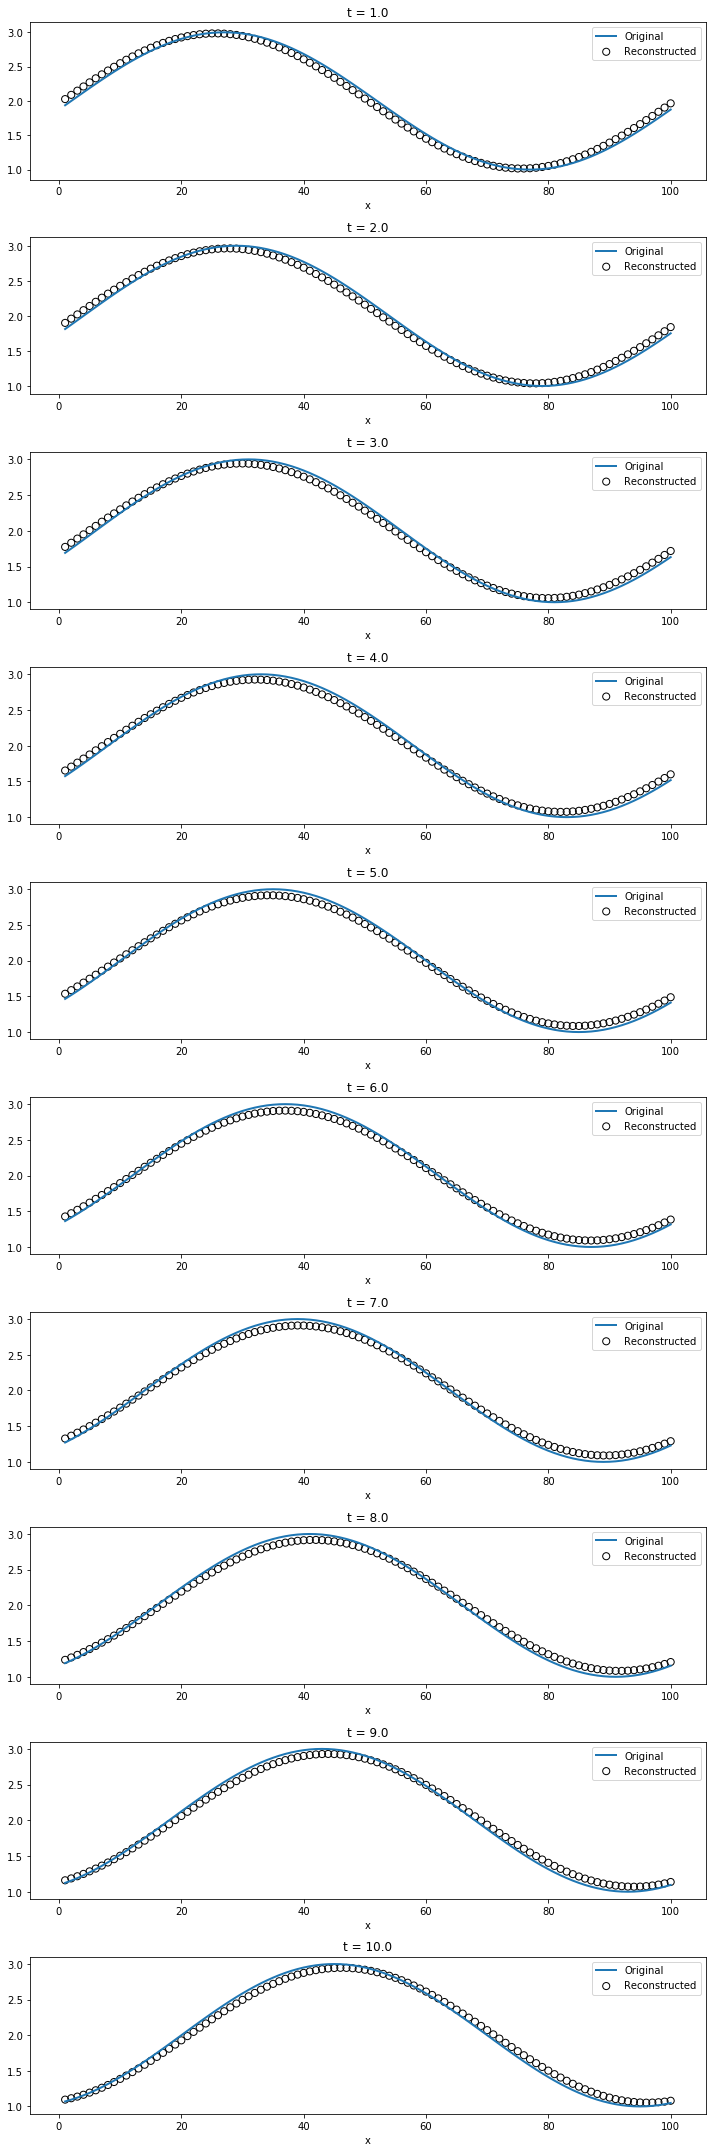

In [13]:
#compare reconstruction with original data to confirm similarity

plt.figure(figsize=(10,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(x,y[ii],linewidth=2)
    plt.scatter(x,y_rec[ii],s=50,facecolors='none',edgecolors='k')
    plt.xlabel('x')
    plt.title('t = '+str(t[ii]))
    plt.legend(['Original','Reconstructed'])
    
plt.tight_layout()
plt.show()

Awesome!  

# Example 3
Investigate PCA on noisy data

In [14]:
#load noise and add it to y
noise = pd.read_csv('noise.csv',header=None)
y += noise.get_values()

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


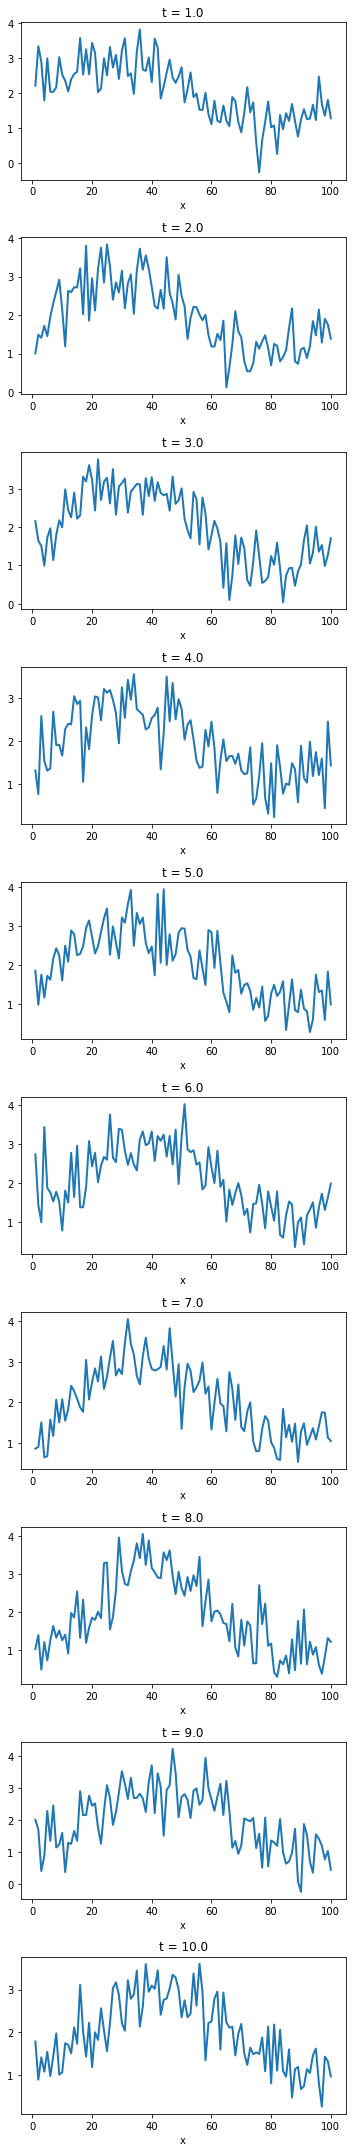

In [15]:
#visualize noisy data

plt.figure(figsize=(5,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(x,y[ii],linewidth=2)
    plt.xlabel('x')
    plt.title('t = '+str(t[ii]))
    
plt.tight_layout()
plt.show()

In [16]:
#perform PCA

n_modes = np.shape(y)[1] #dimension of input = 100, so want 100 modes
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(y)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

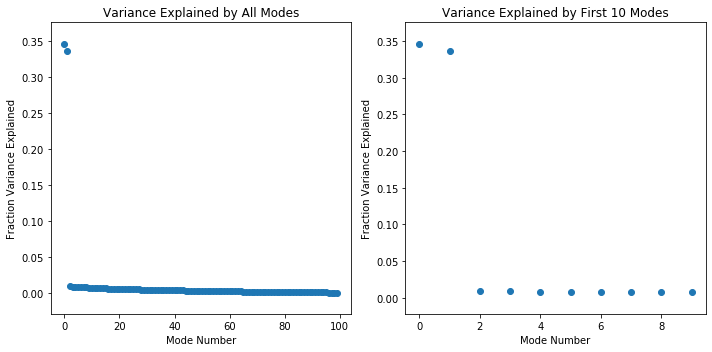

In [17]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

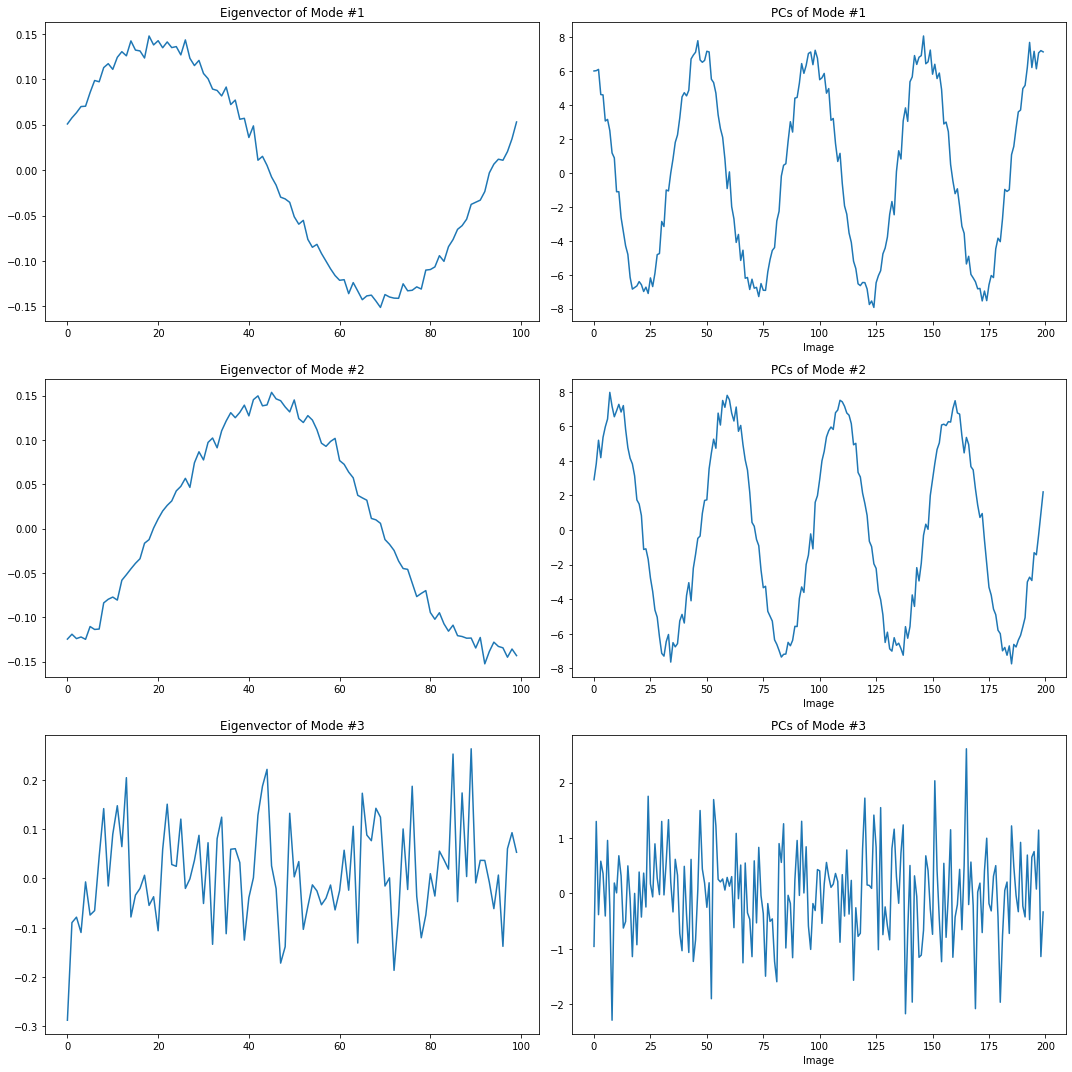

In [18]:
#plot the first n modes and PCs -- looks pretty similar as before!

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Image')
    
    plt.tight_layout()

In [19]:
#reconstruct data from PCs and eigenvectors
#y(t) - mean(y(t)) = sum(PC_j(t)*e_j)

#find mean for each y
mean_y = np.mean(y,axis=1)

#now, reconstruct all in a loop!
y_rec = []
for jj in range(200):
    y_rec.append(PCs[jj,0]*eigvecs[0] + PCs[jj,1]*eigvecs[1])
    y_rec[jj]+=mean_y[jj]

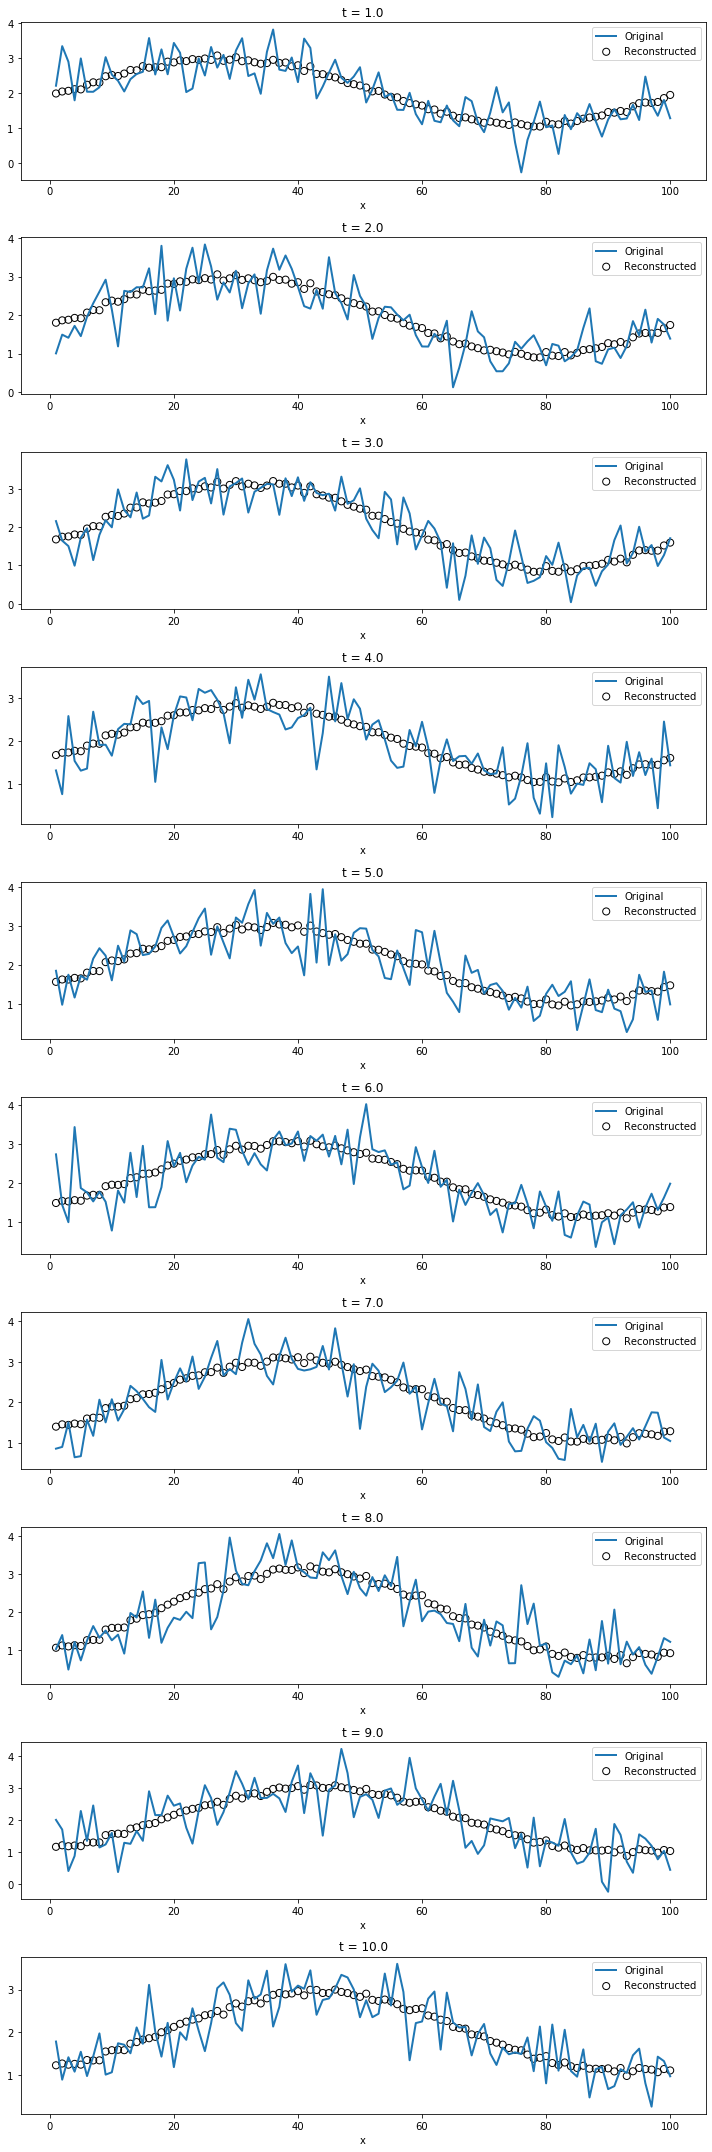

In [20]:
#compare reconstruction with original data to confirm similarity

plt.figure(figsize=(10,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(x,y[ii],linewidth=2)
    plt.scatter(x,y_rec[ii],s=50,facecolors='none',edgecolors='k')
    plt.xlabel('x')
    plt.title('t = '+str(t[ii]))
    plt.legend(['Original','Reconstructed'])
    
plt.tight_layout()
plt.show()